# Introduction to Basic Statistics in Python  
https://wikidocs.net/165583

## 2. Expextation & More Distribution

### 2.1 Expectation

분포와 상관없이,  (정규분포의 parameter인 평균/표준편차와 표기가 겹침)  
__모평균__: μ  
__모표준편차__: σ  

기대값(Expectation): 대략 이렇게 될까 하지 않을까 기대하는 값......  
ex) fair coin을 100번 던질 때, 앞면이 나오는 횟수를 대략 50번 내외라고 기대할 수 있다. 이 50이 기대값.  

기대값은 평균에 한정되어 있지 않다.  
분포의 __퍼짐 정도는 variance로__ 볼 수 있고,  
분포의 __치우침 정도는 skewness로__ 볼 수 있고,  
분포가 __얼마나 뾰족하게 밀집해 있는지는 kurtosis로__ 볼 수 있다.

$\displaystyle m = E(X) = \sum^n_{i=1}x_i p_i$  
$\displaystyle \sigma^2 = V(X) = \sum^n_{i=1}(x_i-m)^2 p_i = \sum^n_{i=1}{x_i}^2p_i-m^2$ 

Binomial distribution들에 대해 주어진 parameter를 가지고 모든 가능한 경우의 수의 확률을 구하고, 이를 토대로 mean과 variance라는 기대값을 구해보세요.

In [1]:
from scipy.stats import binom
def binom_exp(n, p):
    xs = range(n + 1)
    probs = binom.pmf(xs, n, p)
    mean = sum([x*prob for x, prob in zip(xs, probs)])
    var = sum((x-mean)**2*prob for x, prob in zip(xs, probs))

    print(f"Mean of Binom({n}, {p}): {mean:.2f}")
    print(f"Variance of Binom({n}, {p}): {var:.2f}")

In [2]:
binom_exp(10, .2)

Mean of Binom(10, 0.2): 2.00
Variance of Binom(10, 0.2): 1.60


In [3]:
binom_exp(3, 0.9)

Mean of Binom(3, 0.9): 2.70
Variance of Binom(3, 0.9): 0.27


In [5]:
binom_exp(200, 0.05)

Mean of Binom(200, 0.05): 10.00
Variance of Binom(200, 0.05): 9.50


In [6]:
binom_exp(200, .5)

Mean of Binom(200, 0.5): 100.00
Variance of Binom(200, 0.5): 50.00


### 2.2 Independence

__조건부 확률Conditional Probability__  
: 주어진 사건이 있어났다는 가정 하에 다른 한 사건이 일어날 확률  
$$\begin{aligned}
P(A|B) = \frac{P(A\cap B)}{P(B)}
\end{aligned}$$

두 사건이 독립이라는 것은, 둘 중 하나의 사건의 발생 확률과 여부가 다른 사건이 일어날 확률에 영향을 미치지 않는다는 것.
$$\begin{aligned}
P(A|B) = P(A)
\end{aligned}$$
즉, **조건부확률이 원래의 확률과 같다**면 **두 사건은 독립**이다.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

domestic_prices = [9800, 7490, 4480, 3750, 12900, 7480, 11900, 16500, 10620, 7900, 10900, 19500, 8900, 4800, 9900, 34900, 33000, 15000, 49000, 13500, 7950, 8415, 8000, 5500, 7110, 12900, 12160, 8640, 3950, 5480, 6900, 25900, 15800, 6500, 5650, 5980, 10625, 19800, 5600, 29750, 15210, 8820, 9405, 10500, 8850, 7553, 9900, 8980, 19000, 15000, 8000, 3750, 13000, 9900, 5850, 18905, 10000, 39000, 12350, 14400, 45000, 11305, 24900, 11353, 7553, 2975, 11900, 12800, 10500, 7900, 6950, 8500, 2800, 4200, 3500, 6900, 2750, 8500, 5800, 9900, 37000, 13110, 9900, 8900, 29665, 4800, 11950]
imported_prices = [2030, 2280, 750, 8800, 4950, 3200, 2700, 3200, 3800, 7950, 5940, 3300, 11900, 3900, 4700, 4500, 2080, 1350, 1170, 4500, 2160, 8500, 4580, 10900, 8900, 6980, 3900, 5400, 5300, 4500, 4800, 16500, 13500, 4400, 4400, 2660, 39900, 6200, 8700, 1650, 7950, 2900, 3500, 2900, 6950, 6950, 2800, 3500, 6900, 9900, 8500, 14900, 9900, 21000]

total_num_items = len(domestic_prices) + len(imported_prices)

total_price_mean = sum(domestic_prices+imported_prices)/total_num_items 
total_price_std = np.sqrt(sum((np.array(domestic_prices+imported_prices) - total_price_mean)**2)/total_num_items)
print(f"Average price of the entire fruit: {total_price_mean:.2f}")
print(f"Standard deviation of the price of the entire fruit: {total_price_std:.2f}\n")

domestic_price_mean = np.mean(domestic_prices)
domestic_price_std = np.std(domestic_prices)
print(f"Average price of the domestic fruit: {domestic_price_mean:.2f}")
print(f"Std of the domestic fruit prices: {domestic_price_std:.2f}\n")

imported_price_mean = sum(imported_prices) / len(imported_prices)
imported_price_std = (sum((np.array(imported_prices) - imported_price_mean)**2) / len(imported_prices))**0.5
print(f"Average price of the imported fruit: {imported_price_mean:.2f}")
print(f"Std of the imported fruit prices: {imported_price_std:.2f}")

Average price of the entire fruit: 10141.09
Standard deviation of the price of the entire fruit: 8680.49

Average price of the domestic fruit: 12350.74
Std of the domestic fruit prices: 9288.73

Average price of the imported fruit: 6581.11
Std of the imported fruit prices: 6099.39


전체 과일 평균은 약 1만원인 반면,  
국산 과일의 평균은 약 1.2만원, 수입 과일은 약 6500원으로 과일의 산지에 따라 가격이 달라지는 양상을 보인다.  
따라서,  
$P(price|origin) \neq P(price)$

Example Case.  
공정한 주사위를 하나 던질 때,
- 사건 A: 짝수 눈이 나오는 경우
- 사건 B: 4 이상의 눈이 나오는 경우  
두 사건은 서로 독립인가?
  
$\displaystyle P(A) = \frac{1}{2}$  
$\displaystyle P(B) = \frac{1}{2}$  
$\displaystyle P(A\cap B) = \frac{1}{3}$  
$\displaystyle P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{2}{3} \neq P(A)$

Independence의 개념은 확률 분포를 통해 어떤 사건이나 특성(feature)들이 관련이 있는지를 보는 것이다.  
특정 약품이 특정 질병에 효과가 있는지, 시간의 흐름에 따라 기후적 특성이 바뀌는지 등.  
즉, 통계나 머신러닝 모델의 대부분은 유의미한 종속관계를 찾아내는 것에 집중한다고 해도 과언이 아니다.

### 2.3 Sample & Statistic

__모집단Population__  
: 정보를 얻고자 하는 관심 대상의 전체, 고정되어 있지 않아 모호할 수 있다.  
__확률 표본Random Sample__  
: 모집단으로부터 추출한 일부, $X_1, X_2, ..., X_n$이 상호 독립적이며 동일한 분포를 따를 때, 이를 크기 n인 확률표본이라고 한다.

통계학에서 다루는 random sample은 여전히 random variable이다. RV는 아직 값이 정해지지 않은 변수(수집'한'이 아니고 수집'할' 데이터)이며, 이것이 실현(realize)되면 상수가 된다.  

  따라서, random sample의 평균은 결국 RV의 조합으로, 다음과 같이 표현 가능하다.  
  $\displaystyle \bar{X} = \frac{1}{n}(X_1 + ... + X_n)$  
  ($\bar{X}$는 $X$의 평균)  

  이렇게 RV로부터 연산한 값들을 __통계량Statistic__ 이라고 부른다.  

  표본 분산은 다음과 같이 구할 수 있다.  
  $\displaystyle S_x = \frac{1}{n-1}[(X_1-\bar{X})^2 + ... + (X_n - \bar{X})^2]$  
  (chap.3-2에서 자유도(degree of freedom)를 통해 왜 n이 아니고 n-1인지 설명할 예정)

In [37]:
def normal_sample_comparison(n, mu, sigma):
    """
    Normal distribution으로부터 n개의 샘플을 random 추출한 뒤,
    표본 평균(sample_mean)과 분산(sample_sigma)를 실제 parameters(mu, sigma)와 비교하는 함수.
    """
    samples= np.random.normal(mu, sigma, n)
    sample_mean = np.mean(samples)
    sample_sigma = np.std(samples)

    print(f"Sample mean of N({mu}, {sigma}^2): {sample_mean:.2f}")
    print(f"Sample std of N({mu}, {sigma}^2): {sample_sigma:.2f}")

In [76]:
np.random.seed(85)

normal_sample_comparison(100, 50, 3)
print(" ")
normal_sample_comparison(10, 20, 7)
print(" ")
normal_sample_comparison(10000, 0, 100)
print(" ")
normal_sample_comparison(10, 20, 3)
print(" ")
normal_sample_comparison(100, 20, 3)
print(" ")
normal_sample_comparison(10000, 20, 3)

Sample mean of N(50, 3^2): 49.78
Sample std of N(50, 3^2): 3.10
 
Sample mean of N(20, 7^2): 16.40
Sample std of N(20, 7^2): 4.15
 
Sample mean of N(0, 100^2): 0.22
Sample std of N(0, 100^2): 99.89
 
Sample mean of N(20, 3^2): 22.01
Sample std of N(20, 3^2): 2.44
 
Sample mean of N(20, 3^2): 20.51
Sample std of N(20, 3^2): 3.00
 
Sample mean of N(20, 3^2): 19.96
Sample std of N(20, 3^2): 2.99


### 2.4 Chi-squared Distribution

카이제곱 분포는 표준 정규 분포의 제곱합으로 유도될 수 있다.  
n개의 X들이 각각 표준 정규 분포를 따른다면, 그 제곱합은 parameter가 n인 chi-squared distribution을 따른다. (여기서도 X들은 서로 독립이어야 한다.)  
$\displaystyle X_1, X_2, ..., X_n \sim^{i.i.d} Normal(0, 1^2),$  
$\displaystyle Y = X^2_1 + ... + X^2_n,$  
$\displaystyle then \space Y \sim X^2(n)$  

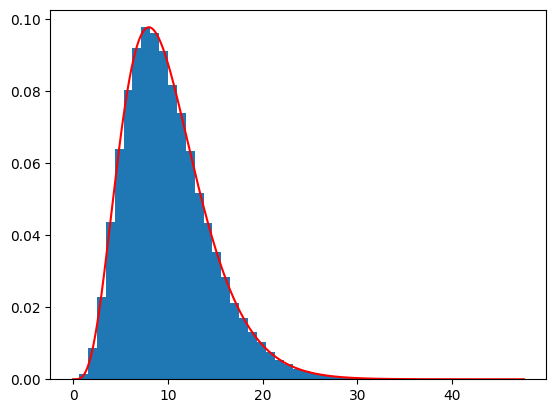

In [118]:
from scipy.stats import chi2

# Randomly-selected lists from normal distribution.
norms = [np.random.normal(0, 1, 10) for _ in range(100000)]

# Get sum of squares(SS) of each array above.
ss = [np.sum(norm**2) for norm in norms]

xs = np.arange(0, np.max(ss), 0.01)

# Get probability of each x from chi-squared distribution with df=10.
ps = chi2.pdf(xs, df=10)

plt.hist(ss, bins = 50, density=True)
plt.plot(xs, ps, color = 'red')
plt.show()

Chi-squared distribution은 일반적으로 분산과 관련된 분포이다.  
(제곱합 > 분산으로 유도 가능, 임의의 정규 분포도 표준 정규 분포로 변환 가능)  

[Parameters]  
- Degree of freedom(df): 자유도, 표본의 개수와 비슷한 개념(몇 개의 정규 분포를 더했는가?)  
  
[Parameter space]  
- 자연수(더한 표준 정규 분포 샘플의 수)
  
[Support]  
- 0 이상의 모든 실수(제곱의 합이므로)
  
분산에 대해 검정을 하는 경우는 평균에 대한 검정에 비해 비교적 적다.  
그럼에도 불구하고 이 분포가 중요한 이유는,
- 먼저, 분산의 비를 나타내는 **F-distribution** 의 기반이 된다.
- 가정한 것 대비 데이터의 노이즈가 얼마나 큰지 수치적으로 나타내는 지표이다.
  (e.g., 적합도 검정Goodness of fit test, 독립성 검정Test of independence, 동질성 검정Test of homogeneity) 

### 2.5 F & t Distribution

#### F distribution  
두 개의 chi-squared distribution의 비ratio로 유도될 수 있다.  
  
$\displaystyle X_1 \sim X^2(u), X_2 \sim X^2(v),$  
$ and \space X_1 \space and \space X_2 \space are \space independent, $  
$\displaystyle then, \frac{X_1/u}{X_2/v} \sim F(u,v)$  
  
카이제곱 분포는 분산과 관련된 분포지만, 분산과 달리 표본 개수(혹은 df)로 나눠주지 않는다.  
F분포는 두 개의 카이제곱 분포를 각각의 자유도로 나누어준 것의 비이다.  
이 때, 두 카이제곱은 서로 독립한다.

F-distribution이 가장 많이 쓰이는 곳 >> 분산 분석Analysis of variance (선형 모형에서의 F test와 같은 맥락)  
*두 분산의 비가 유의하게 다른지*를 비교하는 것이 핵심!

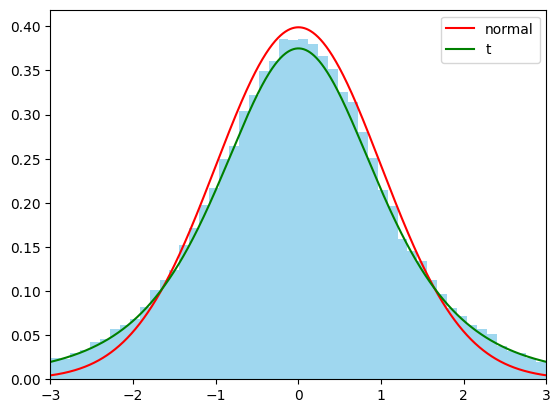

In [162]:
# 표본 평균의 분포가 표준 정규 분포보다 t-분포를 따름을 보이시오.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

mu, sigma, n = 70, 8, 5

np.random.seed(42)
norms = np.random.normal(mu, sigma, (50000, n))
norms_normalized = (np.mean(norms, axis=1) - mu) / (np.std(norms, axis=1, ddof=1) / np.sqrt(n)) # df = n-ddof; ddof=0이면 모표준편차 계산, ddof=1이면 샘플표준편차 계산
norms_normalized = norms_normalized[(norms_normalized > -3) & (norms_normalized < 3)]

xs = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
ps_norm = norm.pdf(xs, loc = 0, scale = 1)
ps_t = t.pdf(xs, n-1, loc = 0, scale = 1)

plt.hist(norms_normalized, bins = 50, density=True, color = 'skyblue', alpha = 0.8)
plt.plot(xs, ps_norm, color = 'red')
plt.plot(xs, ps_t, color = 'green')
plt.xlim(-3, 3)
plt.legend(['normal', 't'])
plt.show()

#### T distribution  
정규분포의 평균과 관련된 분포.  
두 집단 사이의 평균을 비교하는 t-test가 대표적이다.  

t-distribution은 standard normal distribution과 chi-squared distribution으로부터 아래와 같이 유도된다.  
이 때, $Z$는 표준정규분포, $V$는 자유도가 $v$인 카이제곱분포이고, 둘은 서로 독립이다.  
$T = \frac{Z}{\sqrt{V/v}}, \space\space Z \space and \space V \space are \space independent$  

다음의 경우에도 t분포가 사용된다.  
$\bar{X}$가 정규분포를 따른다면 다음이 성릭한다(중심극한정리로 인해 n이 크면 $\bar{X}$는 근사적으로 정규분포를 따른다).    
  
$\displaystyle \sum^n_{i=1}\frac{(X_i - \bar{X})^2}{\sigma^2} \sim \chi^2(n-1),$  
$\displaystyle \frac{(\bar(X) - \mu) / (\sigma / \sqrt{n})}{\sqrt{(1/\sigma^2)\sum^n_{i=1}(X_i-\bar{X})^2 / (n-1)}} = \frac{\sqrt{n(n-1)}(\bar{X} - \mu)}{\sqrt{\sum^n_{i=1}(X_i - \bar{X})^2}} \sim t(n-1)$  
   
이를 정리하면, 표존 평균을 가공한 값이 n-1인 t분포를 따른다는 것이다.  
평균 값에 대한 검정에서 정규 분포를 이용(z-test)하려면 모표준편차를 알아야 하는데, 실제 상황에서 이를 아는 경우는 존재하기 어렵다.  
따라서 모표준편차에 의존하지 않는 t분포를 사용하게 된다.

### 2.6 Cumulative Distribution Function

누적분포함수(CDf)는 RV가 X와 같거나 작을 확률을 나타낸다.  
$CDF :\space F_X(x) = P(X\leq x)$    
  
- $F_X$에서 $F$는 CDF, 아래첨자 $X$는 random variable $X$에 관한 CDF라는 의미
- $a>b$이면 $F(a)\leq F(b)$이다. = 단조 증가Monotonically increasing
- 구간에 대한 확률도 CDF를 통해 구할 수 있다: $P(a<X\leq b) = F_X(b) - F_X(a)$

- $P(X<\infty)$은 모든 표본공간에서 가지는 확률의 합 = 1: $P(-\infty < X < \infty) = 1$
- 따라서, $F_X(\infty) - F_X(-\infty) = 1$로 나타낼 수 있다.
- $F_X(-\infty) = P_X(X\leq -\infty) = 0$

In [176]:
# Poisson distribution과 standard normal distribution의 CDF를 그려보세요.
from scipy.stats import norm, poisson

def draw_norm_cdf(mu, sigma):
    """
    x의 범위는 평균(mu)을 기준으로 3*sigma 전후로 한다.
    """
    xs = np.arange(mu-3*sigma, mu+3*sigma)
    x_cdf = norm.cdf(xs, mu, sigma)

    plt.figure(figsize=(5,4))
    plt.plot(xs, x_cdf)
    plt.title(f"Normal({mu},{sigma}^2)")
    plt.xlabel("x")
    plt.ylabel("P(X<x)")
    plt.show()


def draw_poisson_cdf(lamb):
    """
    x의 범위는 0부터 2*lambda까지로 한다.
    """
    xs = np.arange(0, 2*lamb)
    x_cdf = poisson.cdf(xs, lamb)

    plt.figure(figsize=(5,4))
    plt.plot(xs, x_cdf)
    plt.title(f"Poisson({lamb})")
    plt.xlabel("x")
    plt.ylabel("P(X<x)")
    plt.show()

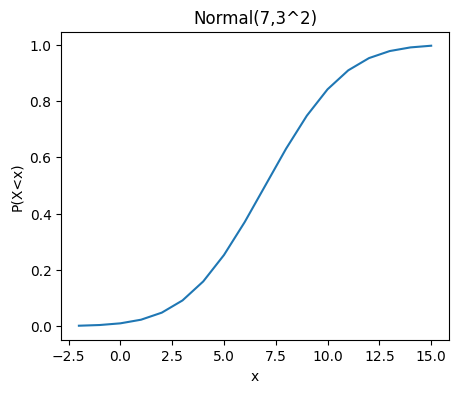

In [177]:
draw_norm_cdf(7, 3)

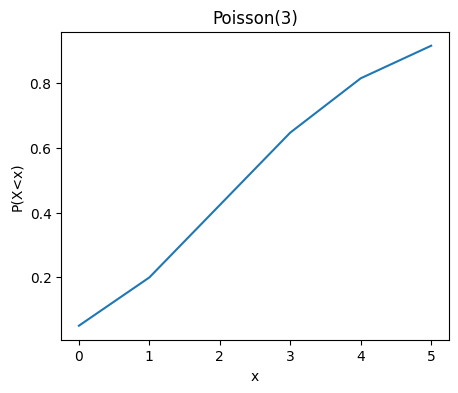

In [178]:
draw_poisson_cdf(3)

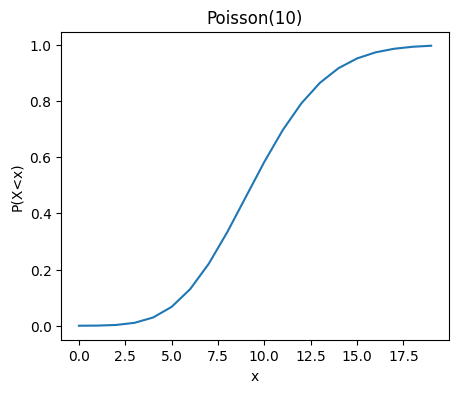

In [179]:
draw_poisson_cdf(10)

CDF와 관련된 pdf와 pmf의 주요한 차이  
- pmf와 달리, **pdf는 점에 대한 확률이 0이고, 구간에 대한 확률**을 구해야 한다.
- ex) 공정한 주사위를 던질 때, 1이 나올 확률은 1/6이 될 수 있다. 하지만 어떤 사람의 키가 정확히 170.000cm가 될 수 있을까? 수학에서는 그럴 가능성이 0에 수렴한다고 보기에 **pdf에서는 각 점에 대한 확률이 아닌, 적분을 통해 계산한 구간에 대한 확률**만을 의미있게 본다.
- $\displaystyle \int^a_b f(x)dx = 0$ 으로 구할 수 있지만, 정규분포를 포함한 많은 분포의 pdf 적분은 쉽지 않다. (정규분포표 이용 권장..)

[Example]  
멘사의 기준(mu=100, sigma=24)에 의하면 IQ 150은 상위 2%이다.  
$\displaystyle F_{IQ}(150) = F_z(\frac{150-100}{24}) = F_z(2.0833...) = 0.981...$   
- $F_{IQ}(150)$은 IQ가 150보다 같거나 작을 확률
- IQ가 $Normal(100, 24^2)$를 따르므로, 평균과 표준편차를 이용해 정규분포로 변환
- 표준정규분포의 CDF는 표준정규분포표 혹은 scipy 패키지(from scipy import stats / stats.norm.cdf((150-100)/24))로 구할 수 있다.
- IQ가 150이하인 인구의 비율이 약 98%이므로 150의 IQ는 상위 2%정도가 된다.

### 2.7 Quantile  

분위수Quantile은 2.6 CDF와 반대되는 개념으로 사용될 수 있다. (역함수는 X)  
**p분위수p-quantile**: 전체 분포를 같은 확률을 가진 p개의 조각으로 등분  

따라서 백분위수Percentile은 전체 분포를 같은 확률을 가진 100개의 조각이 된다.  
확률변수 X에 대해 p백분위수가 k라는 말은 아래 수식으로 표현할 수 있다.  
$$ \begin{aligned}
F_X(k) = p
\end{aligned}$$
CDF에서는 k에 대해 p를 찾았다면, 백분위수에서는 p를 만족하는 k를 찾아나가는 개념이라 둘이 반대되는 개념으로 이해할 수 있다.

사분위수Quartile는 데이터를 네 구간으로 쪼갠 것으로 각각 25, 50, 75 백분위를 가리킨다.  
- Q1(1사분위수, upper quartile/first quartile) = 25백분위수
- Q2(2사분위수, median) = 50백분위수
- Q3(3사분위수, lower quartile, third quartile) = 75백분위수

In [185]:
def iq_percentile(q, mu, std):
    iq = (norm.ppf(1-q) * std) + mu
    print(f"IQ가 평균{mu}, 표준편차 {std}인 정규 분포를 따를 때")
    print(f"상위 {q*100:.2f}의 IQ: {iq:.2f}")

In [186]:
iq_percentile(0.01, 100, 24)

IQ가 평균100, 표준편차 24인 정규 분포를 따를 때
상위 1.00의 IQ: 155.83


In [187]:
iq_percentile(0.10, 100, 24)

IQ가 평균100, 표준편차 24인 정규 분포를 따를 때
상위 10.00의 IQ: 130.76


In [188]:
iq_percentile(0.025, 100, 16)

IQ가 평균100, 표준편차 16인 정규 분포를 따를 때
상위 2.50의 IQ: 131.36


In [189]:
iq_percentile(0.5, 100, 16)

IQ가 평균100, 표준편차 16인 정규 분포를 따를 때
상위 50.00의 IQ: 100.00


보간Interpolation: 주어진 점들 사이의 값을 예측하는 방법론  
예를 들어, $f(1) = 2, f(3) = 6$라는 정보가 주어졌을 때,  자연스럽게 $f(2) = 4$라고 추정estimate할 수 있다. x가 2만큼 증가할 때 y가 4만큼 증가했으니, x가 1만큼 증가한다면 y는 2만큼 증가할 것이라는 '선형 보간Linear interpolation'에 기반한 추정.

### 2.8 Compare Means

In [195]:
# 이항분포와 정규분포로부터 표본을 추출하고 그 비율을 계산하시오.
from collections import Counter, OrderedDict
from scipy.stats import norm, binom

def binom_counter(size):
    samples = binom.rvs(n = 5, p = 0.3, size = size)
    for value, count in sorted(Counter(samples).items()):
        print(f"값이 {value}인 표본의 수: {count}({100*count/size:.2f}%)")

def compare_sample_prob(lower_bound, upper_bound):
    norm_samples = norm.rvs(0, 1, 100000)
    target_samples = norm_samples[(norm_samples > lower_bound) & (norm_samples < upper_bound)]
    target_sample_prop = len(target_samples)/len(norm_samples)
    target_prob = norm.cdf(upper_bound, 0, 1) - norm.cdf(lower_bound)

    print(f"표본에서 타겟 샘플의 비율: {target_sample_prop:.4f}")
    print(f"확률분포에서 타겟 샘플의 확률: {target_prob:.4f}")

In [202]:
binom_counter(10000)
print("\n")
compare_sample_prob(0, 1)
print("\n")
compare_sample_prob(0, 2)
print("\n")
compare_sample_prob(0, 3)
print("\n")
compare_sample_prob(-1, 0)
print("\n")
compare_sample_prob(-np.inf, 0)
print("\n")
compare_sample_prob(-1, 1)

값이 0인 표본의 수: 1743(17.43%)
값이 1인 표본의 수: 3580(35.80%)
값이 2인 표본의 수: 3064(30.64%)
값이 3인 표본의 수: 1311(13.11%)
값이 4인 표본의 수: 273(2.73%)
값이 5인 표본의 수: 29(0.29%)


표본에서 타겟 샘플의 비율: 0.3410
확률분포에서 타겟 샘플의 확률: 0.3413


표본에서 타겟 샘플의 비율: 0.4773
확률분포에서 타겟 샘플의 확률: 0.4772


표본에서 타겟 샘플의 비율: 0.4962
확률분포에서 타겟 샘플의 확률: 0.4987


표본에서 타겟 샘플의 비율: 0.3418
확률분포에서 타겟 샘플의 확률: 0.3413


표본에서 타겟 샘플의 비율: 0.5007
확률분포에서 타겟 샘플의 확률: 0.5000


표본에서 타겟 샘플의 비율: 0.6821
확률분포에서 타겟 샘플의 확률: 0.6827


기댓값으로부터의 평균 $E[X]$와 표본평균 $\bar{X}$의 수식은 각각 아래와 같다.  
전자는 아직 실현되지 않은 분포에 대한 값이라면, 후자는 실제 관측된 값들로부터 얻은 값으로 볼 수 있다.

$$ \begin{aligned}E[X] &= \sum_{i}^{n}X_iP(X_i)\\
&= \sum_{k=1}^5k\times P(X_i=k) \\ 
\bar{X} &=\frac{1}{n} \sum _i ^n X_i
\end{aligned} $$

수식은 다르지만 사실 그 결과는 크게 다르지 않다.  
표본 분포에서 평균을 구할 때는 n으로 나눠주기 때문에 마치 기댓값으로부터 구하는 평균과 수식이 달라보이지만, 표본의 분포에 이미 확률 분포가 반영되어 있기 때문에 확률이 높은 구간에는 더 많은 표본이 있고, 확률이 낮은 구간에는 더 적은 표본이 있어 그 의미가 같다.  

$$\begin{aligned}
\bar{X} &= \frac{1}{n} \sum^n_{i=1}X_i \\
&= \frac{1}{n}(0 \times n_0 + ... + 5 \times n_5) \\
&= \sum^5_{k=0}k\times \frac{n_k}{n} \\
&= \sum^5_{k=0} k \times P_n(X=k) \\
&\approx \sum^n_{k=0} k \times P(X = k) \\
&= E[X]
\end{aligned}$$  

### 2.9 Secretary Problem

**[Problem]**  
비서 1명을 뽑는 공고에 100명의 사람이 지원했습니다. 당신은 한 명씩 면접을 진행하며, 합불여부를 현장에서 바로 통보해야 합니다. 한 번 불합격시킨 면접자는 다시 번복할 수 없고, 합격자가 나오면 이후의 모든 면접은 취소됩니다. 당신의 목표는 100명 중 가장 뛰어난 지원자를 뽑는 것입니다.  
당신은 k%의 지원자를 본 뒤, 그 중 가장 뛰어난 지원자보다 뛰어난 지원자를 나머지 (100-k)%의 지원자 중에서 만나면 뽑기로 결정했습니다. 최적의 k를 시뮬레이션을 통해 구해보세요.

In [227]:
import random

def interview(k):
    scores = list(range(1, 101))
    random.shuffle(scores)

    explore = scores[:k]
    max_explore = max(explore)

    for score in scores[k:]:
        if score > max_explore:
            return score == 100
    return False


def interview_iterator(n, k):
    interviewed = [interview(k) for i in range(n)]
    found_count = sum(interviewed)
    print(f"{n}회 중 성공 횟수: {found_count}({100 * found_count / n}%)")

In [231]:
interview_iterator(1000, 50)

1000회 중 성공 횟수: 348(34.8%)


In [230]:
interview_iterator(10000, 75)

10000회 중 성공 횟수: 2227(22.27%)


In [232]:
interview_iterator(10000, 25)

10000회 중 성공 횟수: 3546(35.46%)


In [233]:
interview_iterator(10000, 37)

10000회 중 성공 횟수: 3649(36.49%)


비서문제(혹은 optimal stopping problem)를 확률적으로 푸는 것은 까다롭지만, 위와 같이 시뮬레이션을 이용한다면 어렵지 않게 최적의 k를 찾을 수 있다.   
확률론을 잘 알지 못하더라도 적절한 시뮬레이션을 통해 주어진 문제 상황에 대한 인사이트를 도출해낼 수 있다.  
이렇게 **시뮬레이션을 이용해 함수의 값을 확률적으로 계산**하는 방법을 **몬테카를로Monte Carlo방법**이라고 한다.